Text preprocessing

In [1]:
import os, re
import pandas as pd
import ufal.udpipe
import conllu

import my_parsers
import classifier_preprocessing
from voters import decision

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [2]:
def zero2one(num):
    if int(num) == 0:
        return 1
    elif int(num) == 1:
        return 0

In [3]:
%%time
decision('Борис взял и он начал читать.')

CPU times: user 11.3 ms, sys: 0 ns, total: 11.3 ms
Wall time: 501 ms


'TRUE'

In [4]:
DATA = os.path.join(os.getcwd(), 'Gold_standard_for_validation.txt')

In [5]:
with open(DATA, mode='r', encoding='utf-16') as data:
    corpus = data.read()

In [6]:
with open(DATA, mode='r', encoding='utf-16') as data:
    df = pd.read_csv(data, sep='\t', header=None, names=['sentence', 'class'])

In [7]:
# df = df.drop(['nan'], axis=1).drop([181])

In [8]:
df['sentence'] = df['sentence'].apply(lambda x: classifier_preprocessing.preprocess(x))

In [9]:
%%time
df['evaluation1'] = df['sentence'].apply(lambda x: decision(x))
df['evaluation2'] = df['sentence'].apply(lambda x: decision(x))
df['evaluation3'] = df['sentence'].apply(lambda x: decision(x))
df['evaluation4'] = df['sentence'].apply(lambda x: decision(x))
df['evaluation5'] = df['sentence'].apply(lambda x: decision(x))

CPU times: user 4.69 s, sys: 441 ms, total: 5.13 s
Wall time: 8min 59s


In [10]:
df[df['evaluation1'] == 'None']

,sentence,class,evaluation1,evaluation2,evaluation3,evaluation4,evaluation5


In [11]:
decision("Борис сказал, что ей холодно.")

'TRUE'

In [12]:
df['numclass'] = df['class'].apply(lambda x: classifier_preprocessing.class2id(x))
df['numeval1'] = df['evaluation1'].apply(lambda x: int(classifier_preprocessing.class2id(x)))
df['numeval2'] = df['evaluation2'].apply(lambda x: int(classifier_preprocessing.class2id(x)))
df['numeval3'] = df['evaluation3'].apply(lambda x: int(classifier_preprocessing.class2id(x)))
df['numeval4'] = df['evaluation4'].apply(lambda x: int(classifier_preprocessing.class2id(x)))
df['numeval5'] = df['evaluation5'].apply(lambda x: int(classifier_preprocessing.class2id(x)))

In [13]:
df_bin = df.copy()

In [14]:
df_bin = df_bin[df_bin['numclass'] != 2].reset_index()

In [15]:
df_bin['bin1'] = df_bin['numclass']
df_bin['bin2'] = df_bin['numclass']
df_bin['bin3'] = df_bin['numclass']
df_bin['bin4'] = df_bin['numclass']
df_bin['bin5'] = df_bin['numclass']

In [16]:
df_bin['bin1'] = [x if x != 2 else zero2one(df_bin['numclass'][i]) for i, x in enumerate(df_bin['numeval1'])]
df_bin['bin2'] = [x if x != 2 else zero2one(df_bin['numclass'][i]) for i, x in enumerate(df_bin['numeval2'])]
df_bin['bin3'] = [x if x != 2 else zero2one(df_bin['numclass'][i]) for i, x in enumerate(df_bin['numeval3'])]
df_bin['bin4'] = [x if x != 2 else zero2one(df_bin['numclass'][i]) for i, x in enumerate(df_bin['numeval4'])]
df_bin['bin5'] = [x if x != 2 else zero2one(df_bin['numclass'][i]) for i, x in enumerate(df_bin['numeval5'])]

In [17]:
df[df['numclass'] == 2]

,sentence,class,evaluation1,evaluation2,evaluation3,evaluation4,evaluation5,numclass,numeval1,numeval2,numeval3,numeval4,numeval5
0,"Борис сказал, что придёт.",coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,2,2,2,2,2,2
5,"Борис встретился с Леной.Говорит, что их отдел...",coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,2,2,2,2,2,2
8,"Борис объявил, что готов.",coreference resolution,TRUE,TRUE,TRUE,TRUE,TRUE,2,1,1,1,1,1
11,"Борис ответил, что придет завтра.",coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,2,2,2,2,2,2
43,"Дима сказал отцу Кирилла, чтобы приходил поско...",coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,2,2,2,2,2,2
47,"Дима сказал, что зайдёт вечером.",coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,2,2,2,2,2,2
78,"Лена разговаривает с Борисом.Говорит, что отде...",coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,2,2,2,2,2,2
83,"Лена сказала, что нужно делать, когда пришла д...",coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,2,2,2,2,2,2
160,"Саша обедает с Сашей.Сказала, что отдел скоро ...",coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,2,2,2,2,2,2
172,"Я сказал ему, чтобы приходил поскорее.",coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,2,2,2,2,2,2


In [18]:
hand_rule_target = df['numclass']
pred1 = df['numeval1']
pred2 = df['numeval2']
pred3 = df['numeval3']
pred4 = df['numeval4']
pred5 = df['numeval5']
predictions = [pred1, pred2, pred3, pred4, pred5]

In [19]:
hand_rule_target_bin = df_bin['numclass']
pred1_bin = df_bin['bin1']
pred2_bin = df_bin['bin2']
pred3_bin = df_bin['bin3']
pred4_bin = df_bin['bin4']
pred5_bin = df_bin['bin5']
predictions_bin = [pred1_bin, pred2_bin, pred3_bin, pred4_bin, pred5_bin] 

In [20]:
pred1_bin

0      1
1      1
2      1
3      1
4      1
      ..
166    1
167    0
168    1
169    1
170    0
Name: bin1, Length: 171, dtype: int64

In [21]:
def precision_mean(predictions: list, target: list, scoring_type: str):
    results = list()
    for pred in predictions:
        results.append(precision_score(target, pred, average=scoring_type))
    return 'Precision mean: %.4f' % (sum(results) / len(results))

In [22]:
def recall_mean(predictions: list, target: list, scoring_type: str):
    results = list()
    for pred in predictions:
        results.append(recall_score(target, pred, average=scoring_type))
    return 'Recall mean: %.4f' % (sum(results) / len(results))

In [23]:
def f1_mean(predictions: list, target: list, scoring_type: str):
    results = list()
    for pred in predictions:
        results.append(f1_score(target, pred, average=scoring_type))
    return 'F1 mean: %.4f' % (sum(results) / len(results))   

## Multiclass task

In [24]:
precision_mean(predictions, hand_rule_target, 'weighted')

'Precision mean: 0.7543'

In [25]:
recall_mean(predictions, hand_rule_target, 'weighted')

'Recall mean: 0.5757'

In [26]:
f1_mean(predictions, hand_rule_target, 'weighted')

'F1 mean: 0.6244'

In [27]:
precision_mean(predictions, hand_rule_target, 'micro')

'Precision mean: 0.5757'

In [28]:
recall_mean(predictions, hand_rule_target, 'micro')

'Recall mean: 0.5757'

In [29]:
f1_mean(predictions, hand_rule_target, 'micro')

'F1 mean: 0.5757'

In [30]:
precision_mean(predictions, hand_rule_target, 'macro')

'Precision mean: 0.4932'

In [31]:
recall_mean(predictions, hand_rule_target, 'macro')

'Recall mean: 0.5758'

In [32]:
f1_mean(predictions, hand_rule_target, 'macro')

'F1 mean: 0.4123'

In [33]:
print(classification_report(hand_rule_target, pred1))

              precision    recall  f1-score   support

           0       0.50      0.17      0.26        35
           1       0.87      0.66      0.75       136
           2       0.14      0.90      0.24        10

    accuracy                           0.58       181
   macro avg       0.50      0.58      0.42       181
weighted avg       0.76      0.58      0.63       181



## Binary task

In [138]:
precision_mean(predictions_bin, hand_rule_target_bin, 'weighted')

'Precision mean: 0.6234'

In [139]:
recall_mean(predictions_bin, hand_rule_target_bin, 'weighted')

'Recall mean: 0.5567'

In [140]:
f1_mean(predictions_bin, hand_rule_target_bin, 'weighted')

'F1 mean: 0.5861'

In [111]:
precision_mean(predictions_bin, hand_rule_target_bin, 'micro')

'Precision mean: 0.5567'

In [112]:
recall_mean(predictions_bin, hand_rule_target_bin, 'micro')

'Recall mean: 0.5567'

In [113]:
f1_mean(predictions_bin, hand_rule_target_bin, 'micro')

'F1 mean: 0.5567'

In [114]:
precision_mean(predictions_bin, hand_rule_target_bin, 'macro')

'Precision mean: 0.4342'

In [115]:
recall_mean(predictions_bin, hand_rule_target_bin, 'macro')

'Recall mean: 0.4137'

In [116]:
f1_mean(predictions_bin, hand_rule_target_bin, 'macro')

'F1 mean: 0.4192'

In [37]:
print(classification_report(hand_rule_target_bin, pred1_bin))

              precision    recall  f1-score   support

           0       0.12      0.17      0.14        35
           1       0.76      0.66      0.71       136

    accuracy                           0.56       171
   macro avg       0.44      0.42      0.42       171
weighted avg       0.63      0.56      0.59       171



In [38]:
%%time
decision('Борис сказал, что богат.')

CPU times: user 7.14 ms, sys: 0 ns, total: 7.14 ms
Wall time: 336 ms


'TRUE'

In [39]:
%%time
decision('Борис сказал, что зайдет вечером.')

CPU times: user 7.94 ms, sys: 641 µs, total: 8.58 ms
Wall time: 378 ms


'coreference resolution'

In [40]:
%%time
decision('Борис взял и вышел.')

CPU times: user 5.92 ms, sys: 308 µs, total: 6.23 ms
Wall time: 501 ms


'TRUE'

In [41]:
%%time 
decision('Миша узнал, что нужно делать, когда он придёт домой.')

CPU times: user 3.33 ms, sys: 3.27 ms, total: 6.6 ms
Wall time: 389 ms


'TRUE'

In [42]:
%%time 
decision('Борис сказал, что богат.')

CPU times: user 6.08 ms, sys: 335 µs, total: 6.41 ms
Wall time: 614 ms


'TRUE'

In [43]:
%%time
decision("Борис сказал, он зайдет.")

CPU times: user 605 µs, sys: 7.56 ms, total: 8.16 ms
Wall time: 891 ms


'TRUE'

In [44]:
%%time 
decision("Он сел рядом со мной на дивание недалеко от камина и после долгого молчания, во время которого я стала чувствовать себя всё более неуютно, он начал говорить.")

CPU times: user 8.41 ms, sys: 474 µs, total: 8.88 ms
Wall time: 617 ms


'TRUE'

In [45]:
%%time 
decision("Он встал и он вышел")

CPU times: user 8.21 ms, sys: 691 µs, total: 8.9 ms
Wall time: 320 ms


'FALSE'

In [46]:
decision("Дима распорядился, чтобы было объявлено, что он покинул страну.")

'TRUE'

In [47]:
decision("Лина хочет, чтобы выиграла")

'FALSE'

In [48]:
decision("Дима сказал маме Кирилла, чтобы она приходила поскорее.")

'TRUE'

In [49]:
decision("Дима сказал маме Кирилла, чтобы приходила поскорее.")

'coreference resolution'

# Classifier

In [50]:
import numpy as np

In [130]:
with open(DATA, mode='r', encoding='utf-16') as data:
    df_clas = pd.read_csv(data, sep='\t', header=None, names=['sentence', 'class'])

In [131]:
df_clas['sentence'] = df_clas['sentence'].apply(lambda x: classifier_preprocessing.preprocess(x))

In [132]:
df_clas['class'] = df_clas['class'].apply(lambda x: classifier_preprocessing.class2id(x))

In [133]:
df_clas

,sentence,class
0,"Борис сказал, что придёт.",2
1,Борис взял и начал читать.,1
2,Борис взял и он начал читать.,0
3,Борис встал и вышел.,1
4,Борис встал и он вышел.,1
...,...,...
176,"Я скоро увижу Лену и я искренно надеюсь, что о...",1
177,"Я только что видел Лену.Она сказала, что наш д...",1
178,"Я только что видел Лену.Сказала, что наш дом п...",0
179,"Я только что встретил Лену.Cказала, что их отд...",0


In [134]:
import my_parsers

In [135]:
%%time
df_clas['conll'] = df_clas['sentence'].apply(lambda x: my_parsers.udpipe_req(x))
df_clas['cconj'] = df_clas['conll'].apply(lambda x: classifier_preprocessing.count_conj(x, 'CCONJ'))
df_clas['sconj'] = df_clas['conll'].apply(lambda x: classifier_preprocessing.count_conj(x, 'SCONJ'))
df_clas['tokens'] = df_clas['conll'].apply(lambda x: classifier_preprocessing.count_tokens(x))
df_clas['nullp'] = df_clas['conll'].apply(lambda x: classifier_preprocessing.count_null_pron(x))
df_clas['overtp'] = df_clas['conll'].apply(lambda x: classifier_preprocessing.count_overt_pron(x))
df_clas['adjunct'] = df_clas['conll'].apply(lambda x: classifier_preprocessing.count_adjuncts(x))
df_clas['whq'] = df_clas['conll'].apply(lambda x: classifier_preprocessing.count_whquestions(x))
df_clas['relc'] = df_clas['conll'].apply(lambda x: classifier_preprocessing.count_relclauses(x))
df_clas['datdep'] = df_clas['conll'].apply(lambda x: classifier_preprocessing.count_case_nodes(x, 'Dat'))
df_clas['nomdep'] = df_clas['conll'].apply(lambda x: classifier_preprocessing.count_case_nodes(x, 'Nom'))
df_clas['rootlen'] = df_clas['conll'].apply(lambda x: classifier_preprocessing.get_root_length(x))
df_clas['rootdeps'] = df_clas['conll'].apply(lambda x: classifier_preprocessing.count_root_dependents(x))
df_clas['rootpos'] = df_clas['conll'].apply(lambda x: classifier_preprocessing.get_root_pos(x))
df_clas['rootmatch'] = df_clas['conll'].apply(lambda x: classifier_preprocessing.is_there_exact_string_match(x))
df_clas['rootdatdep'] = df_clas['conll'].apply(lambda x: classifier_preprocessing.count_root_case_dep(x, 'Dat'))
df_clas['rootnomdep'] = df_clas['conll'].apply(lambda x: classifier_preprocessing.count_root_case_dep(x, 'Nom'))
df_clas['att'] = df_clas['conll'].apply(lambda x: classifier_preprocessing.is_there_att_verb(x))

CPU times: user 1.07 s, sys: 151 ms, total: 1.22 s
Wall time: 2min 24s


### Sentence average length

In [126]:
df_clas['tokens'].mean()

7.917127071823204

### Sentence average length without "coreference resolution" instances

In [128]:
df_clas[df_clas['class'] != 2]['tokens'].mean()

7.988304093567251

In [74]:
df_clas.head()

,sentence,class,conll,cconj,sconj,tokens,nullp,overtp,adjunct,whq,relc,datdep,nomdep,rootlen,rootdeps,rootpos,rootmatch,rootdatdep,rootnomdep,att
0,"Борис сказал, что придёт.",2,"[[{'id': 1, 'form': 'Борис', 'lemma': 'Борис',...",0,1,4,1,1,0,0,0,0,1,6,3,0,1,0,1,1
1,Борис взял и начал читать.,1,"[[{'id': 1, 'form': 'Борис', 'lemma': 'Борис',...",1,0,5,1,1,0,0,0,0,1,4,3,0,1,0,1,0
2,Борис взял и он начал читать.,0,"[[{'id': 1, 'form': 'Борис', 'lemma': 'Борис',...",1,0,6,0,2,0,0,0,0,2,4,3,0,1,0,1,0
3,Борис встал и вышел.,1,"[[{'id': 1, 'form': 'Борис', 'lemma': 'Борис',...",1,0,4,1,1,0,0,0,0,1,5,3,0,1,0,1,0
4,Борис встал и он вышел.,1,"[[{'id': 1, 'form': 'Борис', 'lemma': 'Борис',...",1,0,5,0,2,0,0,0,0,2,5,3,0,1,0,1,0


In [75]:
df_clas

,sentence,class,conll,cconj,sconj,tokens,nullp,overtp,adjunct,whq,relc,datdep,nomdep,rootlen,rootdeps,rootpos,rootmatch,rootdatdep,rootnomdep,att
0,"Борис сказал, что придёт.",2,"[[{'id': 1, 'form': 'Борис', 'lemma': 'Борис',...",0,1,4,1,1,0,0,0,0,1,6,3,0,1,0,1,1
1,Борис взял и начал читать.,1,"[[{'id': 1, 'form': 'Борис', 'lemma': 'Борис',...",1,0,5,1,1,0,0,0,0,1,4,3,0,1,0,1,0
2,Борис взял и он начал читать.,0,"[[{'id': 1, 'form': 'Борис', 'lemma': 'Борис',...",1,0,6,0,2,0,0,0,0,2,4,3,0,1,0,1,0
3,Борис встал и вышел.,1,"[[{'id': 1, 'form': 'Борис', 'lemma': 'Борис',...",1,0,4,1,1,0,0,0,0,1,5,3,0,1,0,1,0
4,Борис встал и он вышел.,1,"[[{'id': 1, 'form': 'Борис', 'lemma': 'Борис',...",1,0,5,0,2,0,0,0,0,2,5,3,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,"Я скоро увижу Лену и я искренно надеюсь, что о...",1,"[[{'id': 1, 'form': 'Я', 'lemma': 'я', 'upos':...",1,1,14,1,6,0,0,0,0,3,5,5,0,1,0,1,1
177,"Я только что видел Лену.Она сказала, что наш д...",1,"[[{'id': 1, 'form': 'Я', 'lemma': 'я', 'upos':...",0,2,11,1,3,0,0,0,0,4,7,4,0,1,0,2,1
178,"Я только что видел Лену.Сказала, что наш дом п...",0,"[[{'id': 1, 'form': 'Я', 'lemma': 'я', 'upos':...",0,2,10,2,2,0,0,0,0,3,7,2,0,1,0,0,1
179,"Я только что встретил Лену.Cказала, что их отд...",0,"[[{'id': 1, 'form': 'Я', 'lemma': 'я', 'upos':...",0,2,11,2,2,0,0,0,0,1,7,2,0,1,0,0,0


# Data description

In [76]:
df_clas = df_clas.drop(['conll', 'sentence'], axis=1)

Number of 'FALSE' sentences

In [77]:
len(df_clas[df_clas['class'] == 0])

35

Number of 'TRUE' sentences

In [78]:
len(df_clas[df_clas['class'] == 1])

136

Number of 'coreference resolution' sentences

In [79]:
len(df_clas[df_clas['class'] == 2])

10

In [80]:
df_clas_binary = df_clas[df_clas['class'] != 2]

In [81]:
dataset = df_clas.to_numpy()

In [82]:
dataset_binary = df_clas_binary.to_numpy()

In [83]:
# target, data
target = dataset[:,0]
data = dataset[:,1:]

In [84]:
target_binary = dataset_binary[:,0]
data_binary = dataset_binary[:,1:]

In [85]:
target

array([2, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2,
       1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0,
       1, 1, 0, 0, 1])

In [86]:
column_names = df_clas.drop(['class'], axis=1).columns.values

In [87]:
column_names

array(['cconj', 'sconj', 'tokens', 'nullp', 'overtp', 'adjunct', 'whq',
       'relc', 'datdep', 'nomdep', 'rootlen', 'rootdeps', 'rootpos',
       'rootmatch', 'rootdatdep', 'rootnomdep', 'att'], dtype=object)

# Evaluation

In [88]:
# !pip3 install matplotlib

In [89]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density

import matplotlib.pyplot as plt

In [90]:
def benchmark(clf, data, target, scoring_type='binary'):
    importances = list()
    
    if scoring_type == 'binary':
        suffix = ''
    else:
        suffix = '_' + str(scoring_type)
        
    scoring = ['precision'+suffix, 'recall'+suffix, 'f1'+suffix]
        
    print('Training: ', clf)
    cv_results = cross_validate(clf, data, target, cv=5, 
                                scoring=scoring,
                                return_estimator=True)
    precision_mean = cv_results['test_'+scoring[0]].mean()
    precision_std = cv_results['test_'+scoring[0]].std()
    print('Precision - mean: %.4f' % precision_mean, ' - std: %.4f' % precision_std)
    
    recall_mean = cv_results['test_'+scoring[1]].mean()
    recall_std = cv_results['test_'+scoring[1]].std()
    print('Recall - mean: %.4f' % recall_mean, ' - std: %.4f' % recall_std)
    
    f1score_mean = cv_results['test_'+scoring[2]].mean()
    f1score_std = cv_results['test_'+scoring[2]].std()
    print('F1 score - mean: %.4f' % f1score_mean, ' - std: %.4f' % f1score_std)
    
    print()
    clf_descr = str(clf).split('(')[0]
    
    for i, estimator in enumerate(cv_results['estimator']):
        try:
            print("Features sorted by their score for estimator {}:".format(i))
            importances.append(estimator.feature_importances_)
            feature_importances = pd.DataFrame(estimator.feature_importances_,
                                               index = column_names,
                                               columns=['importance']).sort_values('importance', ascending=False)
            print(feature_importances)
        except AttributeError:
            print(" --- NO IMPORTANCES --- ")
            continue
    return clf_descr, precision_mean, recall_mean, f1score_mean, importances

In [91]:
def get_results(data, target, scoring_type='binary'):
    results = list()
    for clf, name in (
            (RidgeClassifier(tol=1e-2, solver="sag"), "Ridge Classifier"),
            (Perceptron(max_iter=50), "Perceptron"),
            (PassiveAggressiveClassifier(max_iter=50),
             "Passive-Aggressive"),
            (KNeighborsClassifier(n_neighbors=10), "kNN"),
            (RandomForestClassifier(), "Random forest")):
        print('=' * 80)
        print(name)
        results.append(benchmark(clf, data, target, scoring_type))

    for penalty in ["l2", "l1"]:
        print('=' * 80)
        print("%s penalty" % penalty.upper())
        # Train Liblinear model
        results.append(benchmark(LinearSVC(penalty=penalty, dual=False,
                                           tol=1e-3), data, target, scoring_type))

        # Train SGD model
        results.append(benchmark(SGDClassifier(alpha=.0001, max_iter=500,
                                               penalty=penalty), data, target, scoring_type))

    # Train SGD with Elastic Net penalty
    print('=' * 80)
    print("Elastic-Net penalty")
    results.append(benchmark(SGDClassifier(alpha=.0001, max_iter=500,
                                           penalty="elasticnet"), data, target, scoring_type))

    # Train NearestCentroid without threshold
    print('=' * 80)
    print("NearestCentroid (aka Rocchio classifier)")
    results.append(benchmark(NearestCentroid(), data, target, scoring_type))

    # Train sparse Naive Bayes classifiers
    print('=' * 80)
    print("Naive Bayes")
    results.append(benchmark(MultinomialNB(alpha=.01), data, target, scoring_type))
    results.append(benchmark(BernoulliNB(alpha=.01), data, target, scoring_type))
    results.append(benchmark(ComplementNB(alpha=.1), data, target, scoring_type))

    print('=' * 80)
    print("LinearSVC with L1-based feature selection")
    # The smaller C, the stronger the regularization.
    # The more regularization, the more sparsity.
    results.append(benchmark(Pipeline([
      ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False,
                                                      tol=1e-3, max_iter=30000))),
      ('classification', LinearSVC(penalty="l2", max_iter=30000))]), data, target, scoring_type))
    return results

In [92]:
def plot_graph(results):
    indices = np.arange(len(results))

    results = [[x[i] for x in results] for i in range(4)]
    # print(results)

    clf_names, precision, recall, f1score = results

    plt.figure(figsize=(12, 8))
    plt.title("Evaluation")

    plt.barh(indices, precision, .2, label="precision", color='navy')
    plt.barh(indices + .3, recall, .2, label="recall", color='c')
    plt.barh(indices + .6, f1score, .2, label="f1_score", color='darkorange')

    plt.yticks(())
    plt.legend(loc='best')
    plt.subplots_adjust(left=.25)
    plt.subplots_adjust(top=.95)
    plt.subplots_adjust(bottom=.05)

    for i, c in zip(indices, clf_names):
        plt.text(-.3, i, c)

    plt.show()
    return precision, recall, f1score

In [93]:
def plot_importances(results):    
    importances = [x[4] for x in results if x[4]]
    mean = np.mean(importances, axis=1)
    std = np.std(importances, axis=1) 
    
    forest_importances = pd.Series(mean[0], index=list(column_names))
    plt.figure(figsize=(12, 8))
    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    fig.tight_layout()

## Multiclass task

### MICRO

In [94]:
%%time
results = get_results(data, target, scoring_type='micro')

Ridge Classifier
Training:  RidgeClassifier(solver='sag', tol=0.01)
Precision - mean: 0.7572  - std: 0.0384
Recall - mean: 0.7572  - std: 0.0384
F1 score - mean: 0.7572  - std: 0.0384

Features sorted by their score for estimator 0:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 1:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 2:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 3:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 4:
 --- NO IMPORTANCES --- 
Perceptron
Training:  Perceptron(max_iter=50)
Precision - mean: 0.7237  - std: 0.0843
Recall - mean: 0.7237  - std: 0.0843
F1 score - mean: 0.7237  - std: 0.0843

Features sorted by their score for estimator 0:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 1:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 2:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 3:
 --- NO IMPORTANCES 

Precision - mean: 0.7243  - std: 0.0622
Recall - mean: 0.7243  - std: 0.0622
F1 score - mean: 0.7243  - std: 0.0622

Features sorted by their score for estimator 0:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 1:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 2:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 3:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 4:
 --- NO IMPORTANCES --- 
CPU times: user 3 s, sys: 24.3 ms, total: 3.03 s
Wall time: 3.04 s


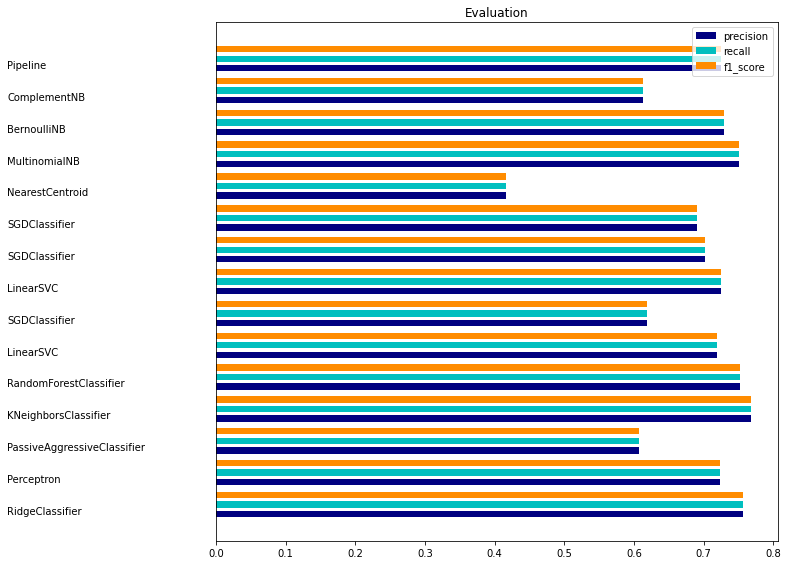

In [95]:
precision, recall, f1score = plot_graph(results)

In [96]:
print(sum(precision)/len(precision))
print(sum(recall)/len(recall))
print(sum(f1score)/len(f1score))

0.6864864864864866
0.6864864864864866
0.6864864864864866


<Figure size 864x576 with 0 Axes>

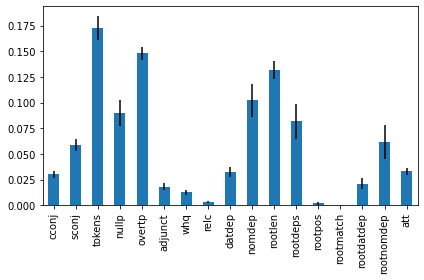

In [97]:
plot_importances(results)

### MACRO

In [98]:
%%time
results = get_results(data, target, scoring_type='macro')

Ridge Classifier
Training:  RidgeClassifier(solver='sag', tol=0.01)
Precision - mean: 0.4278  - std: 0.1242
Recall - mean: 0.3760  - std: 0.0430
F1 score - mean: 0.3672  - std: 0.0572

Features sorted by their score for estimator 0:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 1:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 2:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 3:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 4:
 --- NO IMPORTANCES --- 
Perceptron
Training:  Perceptron(max_iter=50)
Precision - mean: 0.3879  - std: 0.0862
Recall - mean: 0.4323  - std: 0.0832
F1 score - mean: 0.4050  - std: 0.0764

Features sorted by their score for estimator 0:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 1:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 2:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 3:
 --- NO IMPORTANCES 

/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classi

Precision - mean: 0.5079  - std: 0.0725
Recall - mean: 0.5230  - std: 0.0818
F1 score - mean: 0.5067  - std: 0.0726

Features sorted by their score for estimator 0:
            importance
tokens        0.172570
overtp        0.144341
rootlen       0.127644
rootdeps      0.103265
nomdep        0.101819
nullp         0.087991
rootnomdep    0.044000
sconj         0.042843
datdep        0.036886
cconj         0.036069
att           0.034301
rootdatdep    0.027074
adjunct       0.021153
whq           0.012734
relc          0.003982
rootpos       0.003328
rootmatch     0.000000
Features sorted by their score for estimator 1:
            importance
tokens        0.167001
overtp        0.144624
rootlen       0.126975
nomdep        0.091915
rootnomdep    0.083621
nullp         0.080433
rootdeps      0.075692
sconj         0.062723
att           0.034470
datdep        0.034265
cconj         0.033512
rootdatdep    0.029619
adjunct       0.019117
whq           0.013563
relc          0.002472
rootp

/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classi

Precision - mean: 0.3472  - std: 0.0971
Recall - mean: 0.3497  - std: 0.0450
F1 score - mean: 0.3342  - std: 0.0573

Features sorted by their score for estimator 0:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 1:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 2:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 3:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 4:
 --- NO IMPORTANCES --- 
Training:  SGDClassifier(max_iter=500, penalty='l1')
Precision - mean: 0.3644  - std: 0.1500
Recall - mean: 0.3564  - std: 0.0943
F1 score - mean: 0.3451  - std: 0.1027

Features sorted by their score for estimator 0:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 1:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 2:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 3:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 4:
 --- NO 

/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classi

Precision - mean: 0.3472  - std: 0.0971
Recall - mean: 0.3497  - std: 0.0450
F1 score - mean: 0.3342  - std: 0.0573

Features sorted by their score for estimator 0:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 1:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 2:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 3:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 4:
 --- NO IMPORTANCES --- 
CPU times: user 3.03 s, sys: 57.2 ms, total: 3.09 s
Wall time: 3.07 s


/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


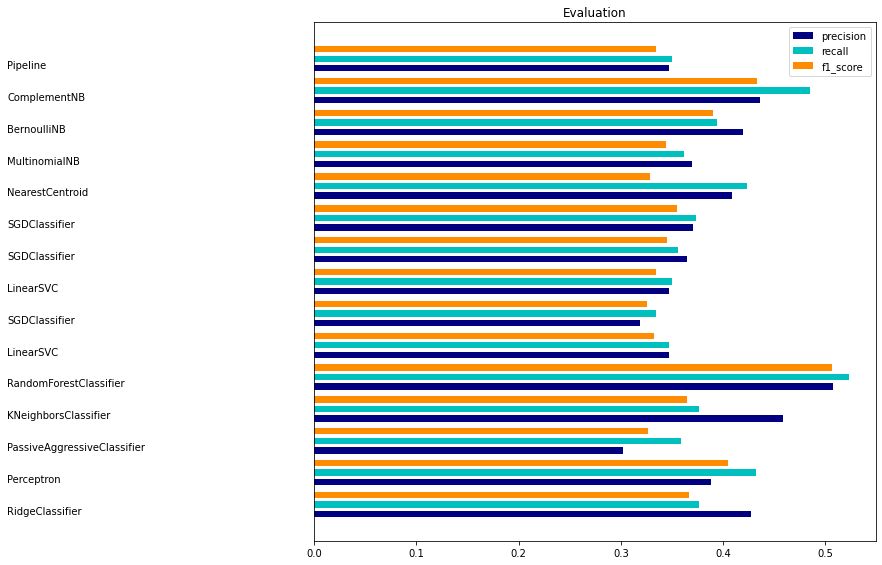

In [99]:
precision, recall, f1score = plot_graph(results)

In [100]:
print(sum(precision)/len(precision))
print(sum(recall)/len(recall))
print(sum(f1score)/len(f1score))

0.387584775765595
0.38949441504997057
0.36626123832198465


<Figure size 864x576 with 0 Axes>

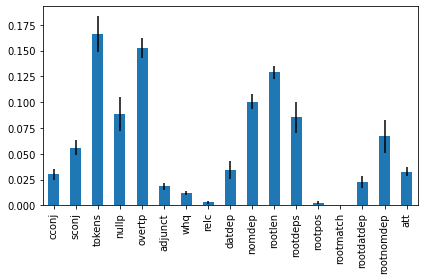

In [101]:
plot_importances(results)

### WEIGHTED

In [102]:
%%time
results = get_results(data, target, scoring_type='weighted')

Ridge Classifier
Training:  RidgeClassifier(solver='sag', tol=0.01)
Precision - mean: 0.6879  - std: 0.0747
Recall - mean: 0.7572  - std: 0.0384
F1 score - mean: 0.6968  - std: 0.0415

Features sorted by their score for estimator 0:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 1:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 2:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 3:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 4:
 --- NO IMPORTANCES --- 
Perceptron
Training:  Perceptron(max_iter=50)
Precision - mean: 0.6482  - std: 0.0729
Recall - mean: 0.7237  - std: 0.0843
F1 score - mean: 0.6814  - std: 0.0719

Features sorted by their score for estimator 0:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 1:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 2:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 3:
 --- NO IMPORTANCES 

/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classi

Precision - mean: 0.7163  - std: 0.0637
Recall - mean: 0.7517  - std: 0.0274
F1 score - mean: 0.7270  - std: 0.0378

Features sorted by their score for estimator 0:
            importance
tokens        0.167606
overtp        0.158742
rootlen       0.111261
nullp         0.102813
rootdeps      0.099567
nomdep        0.093230
rootnomdep    0.048623
sconj         0.043093
cconj         0.038684
datdep        0.038108
att           0.029925
rootdatdep    0.027324
adjunct       0.019133
whq           0.015667
relc          0.003195
rootpos       0.003027
rootmatch     0.000000
Features sorted by their score for estimator 1:
            importance
tokens        0.170301
overtp        0.158350
rootlen       0.122993
nomdep        0.100844
nullp         0.081982
rootnomdep    0.072071
rootdeps      0.065175
sconj         0.057558
att           0.037571
cconj         0.034344
datdep        0.033276
rootdatdep    0.028138
adjunct       0.019886
whq           0.014704
relc          0.002806
rootp

/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classi

Precision - mean: 0.6386  - std: 0.0662
Recall - mean: 0.7243  - std: 0.0622
F1 score - mean: 0.6689  - std: 0.0512

Features sorted by their score for estimator 0:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 1:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 2:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 3:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 4:
 --- NO IMPORTANCES --- 
Training:  SGDClassifier(max_iter=500, penalty='l1')
Precision - mean: 0.7162  - std: 0.0520
Recall - mean: 0.6962  - std: 0.1135
F1 score - mean: 0.6868  - std: 0.0855

Features sorted by their score for estimator 0:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 1:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 2:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 3:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 4:
 --- NO 

/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classi

Precision - mean: 0.6386  - std: 0.0662
Recall - mean: 0.7243  - std: 0.0622
F1 score - mean: 0.6689  - std: 0.0512

Features sorted by their score for estimator 0:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 1:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 2:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 3:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 4:
 --- NO IMPORTANCES --- 
CPU times: user 2.64 s, sys: 60.2 ms, total: 2.7 s
Wall time: 2.67 s


/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


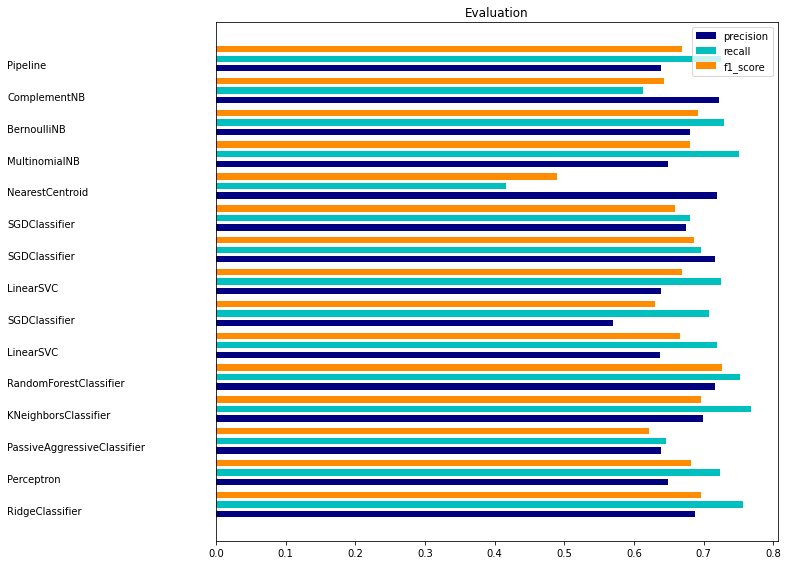

In [103]:
precision, recall, f1score = plot_graph(results)

In [104]:
print(sum(precision)/len(precision))
print(sum(recall)/len(recall))
print(sum(f1score)/len(f1score))

0.6690374249797182
0.6939239239239239
0.660399962832571


<Figure size 864x576 with 0 Axes>

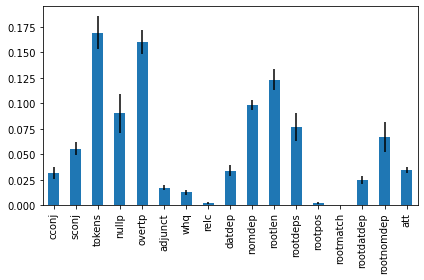

In [105]:
plot_importances(results)

## Binary task

In [136]:
%%time
results = get_results(data_binary, target_binary, scoring_type='weighted')

Ridge Classifier
Training:  RidgeClassifier(solver='sag', tol=0.01)
Precision - mean: 0.7681  - std: 0.0986
Recall - mean: 0.7958  - std: 0.0498
F1 score - mean: 0.7525  - std: 0.0523

Features sorted by their score for estimator 0:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 1:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 2:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 3:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 4:
 --- NO IMPORTANCES --- 
Perceptron
Training:  Perceptron(max_iter=50)
Precision - mean: 0.7602  - std: 0.1195
Recall - mean: 0.8017  - std: 0.0543
F1 score - mean: 0.7596  - std: 0.0764

Features sorted by their score for estimator 0:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 1:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 2:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 3:
 --- NO IMPORTANCES 

/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classi

Precision - mean: 0.7831  - std: 0.0777
Recall - mean: 0.7960  - std: 0.0582
F1 score - mean: 0.7805  - std: 0.0584

Features sorted by their score for estimator 0:
            importance
tokens        0.151777
overtp        0.141532
nomdep        0.119821
rootdeps      0.113990
rootlen       0.110219
nullp         0.094230
cconj         0.051422
rootnomdep    0.047201
sconj         0.046516
datdep        0.039984
att           0.030199
rootdatdep    0.017042
adjunct       0.014719
whq           0.014084
rootpos       0.003778
relc          0.003485
rootmatch     0.000000
Features sorted by their score for estimator 1:
            importance
tokens        0.174636
overtp        0.140204
rootlen       0.107862
nomdep        0.102546
nullp         0.089326
rootnomdep    0.080482
rootdeps      0.067061
sconj         0.064067
cconj         0.038315
datdep        0.037955
att           0.035417
rootdatdep    0.027845
adjunct       0.020805
whq           0.009521
relc          0.003957
rootp

/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision - mean: 0.7416  - std: 0.0853
Recall - mean: 0.6259  - std: 0.0789
F1 score - mean: 0.6573  - std: 0.0738

Features sorted by their score for estimator 0:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 1:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 2:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 3:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 4:
 --- NO IMPORTANCES --- 
LinearSVC with L1-based feature selection
Training:  Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(dual=False, max_iter=30000,
                                                     penalty='l1',
                                                     tol=0.001))),
                ('classification', LinearSVC(max_iter=30000))])
Precision - mean: 0.7655  - std: 0.0964
Recall - mean: 0.7845  - std: 0.0844
F1 score - mean: 0.7577  - std: 0.0742

Features sorted by their score 

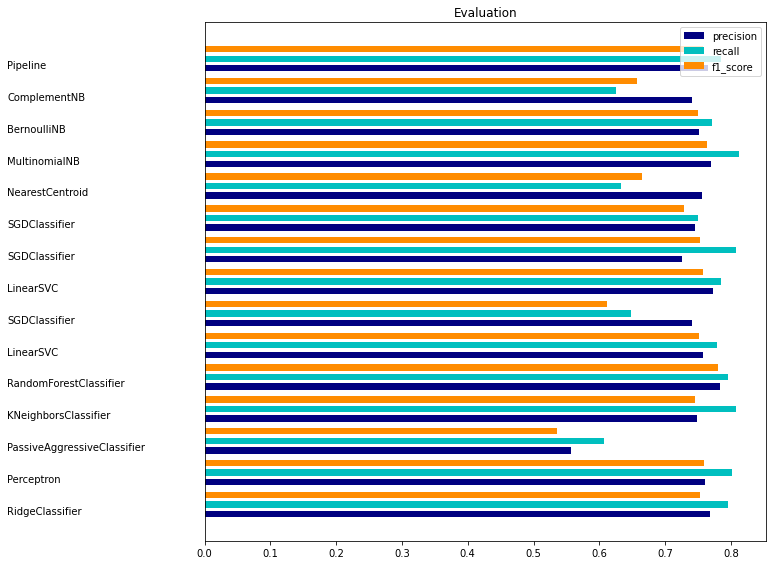

In [137]:
precision, recall, f1score = plot_graph(results)

In [108]:
print(sum(precision)/len(precision))
print(sum(recall)/len(recall))
print(sum(f1score)/len(f1score))

0.8383620822755933
0.8584832451499118
0.837786186256944


<Figure size 864x576 with 0 Axes>

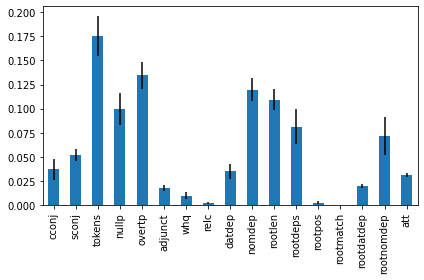

In [109]:
plot_importances(results)

In [118]:
%%time
results = get_results(data_binary, target_binary, scoring_type='micro')

Ridge Classifier
Training:  RidgeClassifier(solver='sag', tol=0.01)
Precision - mean: 0.7958  - std: 0.0498
Recall - mean: 0.7958  - std: 0.0498
F1 score - mean: 0.7958  - std: 0.0498

Features sorted by their score for estimator 0:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 1:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 2:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 3:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 4:
 --- NO IMPORTANCES --- 
Perceptron
Training:  Perceptron(max_iter=50)
Precision - mean: 0.8017  - std: 0.0543
Recall - mean: 0.8017  - std: 0.0543
F1 score - mean: 0.8017  - std: 0.0543

Features sorted by their score for estimator 0:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 1:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 2:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 3:
 --- NO IMPORTANCES 

Precision - mean: 0.7845  - std: 0.0844
Recall - mean: 0.7845  - std: 0.0844
F1 score - mean: 0.7845  - std: 0.0844

Features sorted by their score for estimator 0:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 1:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 2:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 3:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 4:
 --- NO IMPORTANCES --- 
CPU times: user 2.37 s, sys: 116 ms, total: 2.49 s
Wall time: 3.09 s


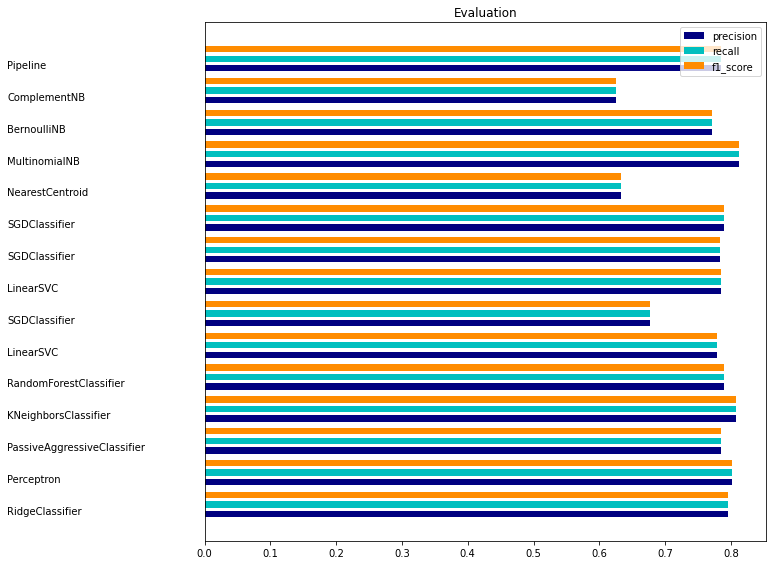

In [119]:
precision, recall, f1score = plot_graph(results)

In [120]:
print(sum(precision)/len(precision))
print(sum(recall)/len(recall))
print(sum(f1score)/len(f1score))

0.7613893557422968
0.7613893557422968
0.7613893557422968


<Figure size 864x576 with 0 Axes>

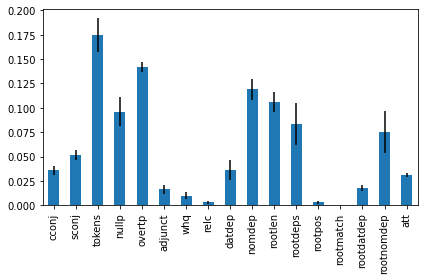

In [121]:
plot_importances(results)

In [122]:
%%time
results = get_results(data_binary, target_binary, scoring_type='macro')

Ridge Classifier
Training:  RidgeClassifier(solver='sag', tol=0.01)
Precision - mean: 0.6955  - std: 0.2141
Recall - mean: 0.5640  - std: 0.0645
F1 score - mean: 0.5667  - std: 0.0918

Features sorted by their score for estimator 0:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 1:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 2:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 3:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 4:
 --- NO IMPORTANCES --- 
Perceptron
Training:  Perceptron(max_iter=50)
Precision - mean: 0.6363  - std: 0.2126
Recall - mean: 0.6099  - std: 0.1674
F1 score - mean: 0.5807  - std: 0.1546

Features sorted by their score for estimator 0:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 1:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 2:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 3:
 --- NO IMPORTANCES 

/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classi

Precision - mean: 0.6562  - std: 0.2319
Recall - mean: 0.5497  - std: 0.0571
F1 score - mean: 0.5369  - std: 0.0910

Features sorted by their score for estimator 0:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 1:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 2:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 3:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 4:
 --- NO IMPORTANCES --- 
Random forest
Training:  RandomForestClassifier()


/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision - mean: 0.6490  - std: 0.1390
Recall - mean: 0.6562  - std: 0.0813
F1 score - mean: 0.6389  - std: 0.1057

Features sorted by their score for estimator 0:
            importance
tokens        0.177202
overtp        0.125025
rootlen       0.123641
rootdeps      0.105848
nomdep        0.105837
nullp         0.088137
cconj         0.051201
rootnomdep    0.048984
sconj         0.044598
datdep        0.036248
att           0.035111
rootdatdep    0.021738
adjunct       0.017298
whq           0.012878
rootpos       0.004398
relc          0.001856
rootmatch     0.000000
Features sorted by their score for estimator 1:
            importance
tokens        0.181450
overtp        0.155104
rootlen       0.114086
nomdep        0.106714
nullp         0.091413
rootnomdep    0.073620
sconj         0.062750
rootdeps      0.055046
datdep        0.037885
cconj         0.036323
att           0.033355
adjunct       0.019086
rootdatdep    0.015633
whq           0.014903
relc          0.002632
rootp

/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lauberto/.local/lib/python3.8/site-packages/sklearn/metrics/_classi

Precision - mean: 0.5911  - std: 0.1141
Recall - mean: 0.6306  - std: 0.1576
F1 score - mean: 0.5708  - std: 0.1307

Features sorted by their score for estimator 0:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 1:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 2:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 3:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 4:
 --- NO IMPORTANCES --- 
Naive Bayes
Training:  MultinomialNB(alpha=0.01)
Precision - mean: 0.6940  - std: 0.2035
Recall - mean: 0.5746  - std: 0.0583
F1 score - mean: 0.5774  - std: 0.0911

Features sorted by their score for estimator 0:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 1:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 2:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 3:
 --- NO IMPORTANCES --- 
Features sorted by their score for estimator 4:
 --- NO IMPO

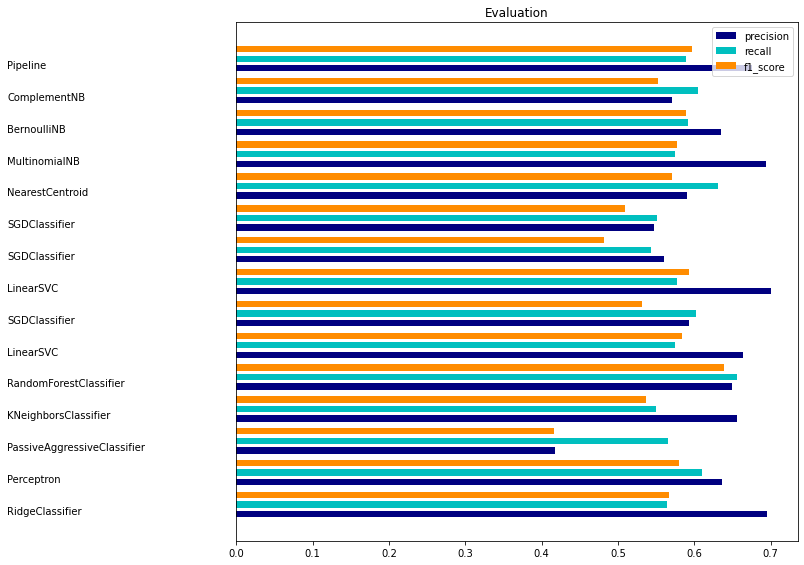

In [123]:
precision, recall, f1score = plot_graph(results)

In [124]:
print(sum(precision)/len(precision))
print(sum(recall)/len(recall))
print(sum(f1score)/len(f1score))

0.6190877904531445
0.585784832451499
0.5552411473510385


<Figure size 864x576 with 0 Axes>

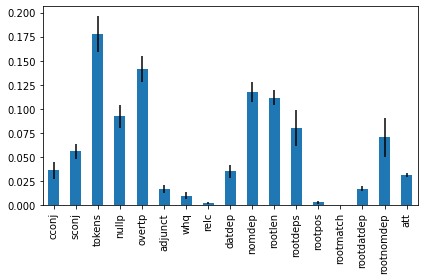

In [125]:
plot_importances(results)

In [110]:
df_bin[df_bin['numeval1'] == 2]

,index,sentence,class,evaluation1,evaluation2,evaluation3,evaluation4,evaluation5,numclass,numeval1,numeval2,numeval3,numeval4,numeval5,bin1,bin2,bin3,bin4,bin5
5,7,"Борис обедал с Петей.Сказал, что отдел скоро з...",TRUE,coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,1,2,2,2,2,2,0,0,0,0,0
14,18,"Борис сказал ей, что будет работать всю ночь.",TRUE,coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,1,2,2,2,2,2,0,0,0,0,0
29,33,"Дима знает, что был студентом.",TRUE,coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,1,2,2,2,2,2,0,0,0,0,0
36,40,"Дима распорядился, чтобы было объявлено, что п...",FALSE,coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,0,2,2,2,2,2,1,1,1,1,1
43,49,"Дорога ее не устраивала, поскольку не вела к м...",TRUE,coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,1,2,2,2,2,2,0,0,0,0,0
45,51,"Дорога их не устраивала, поскольку не вела к м...",TRUE,coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,1,2,2,2,2,2,0,0,0,0,0
47,53,"Дочь президента объявила, что выступит с докла...",TRUE,coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,1,2,2,2,2,2,0,0,0,0,0
50,56,"Ему кажется, что ответил.",FALSE,coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,0,2,2,2,2,2,1,1,1,1,1
51,57,Здесь не любят чужаков.,TRUE,coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,1,2,2,2,2,2,0,0,0,0,0
52,58,Здесь они не любят чужаков.,FALSE,coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,0,2,2,2,2,2,1,1,1,1,1
